In [4]:
!pip install pandas-datareader

import pandas_datareader.data as web
import datetime

  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


In [5]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

In [12]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e0/e2/2ff5e8e06734c1f6f3933274d1eed1ea9e0904bf7a795869a417f5d3de41/cmdstanpy-1.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/7d/4c/aebe3bbec08801907c4107f746ddf4e470075d0f7bde5883e169186b384a/holidays-0.49-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/55/35/076a5ff427a47613581f6bd7acebfa8d49046a1b78132

          ds     y
0 2023-06-02  0.00
1 2023-06-03  1.05
2 2023-06-04  2.10
3 2023-06-05  3.15
4 2023-06-06  4.20


10:21:57 - cmdstanpy - INFO - Chain [1] start processing
10:21:57 - cmdstanpy - INFO - Chain [1] done processing


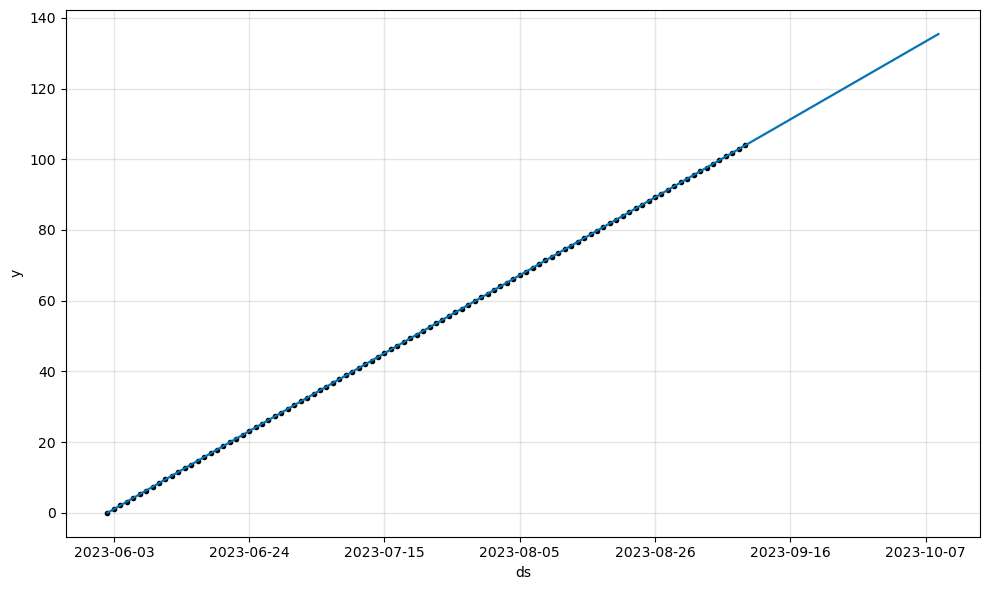

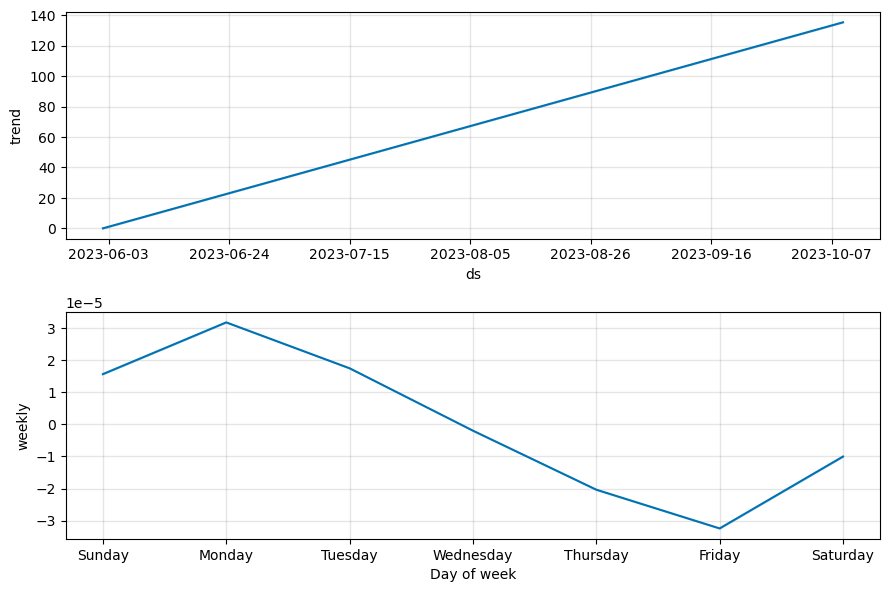

In [16]:
# Install prophet if not already installed
!pip install prophet

# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample data creation
data = {
    'ds': pd.date_range(start='2023-06-02', periods=100, freq='D'),
    'y': [x + (x*0.05) for x in range(100)]
}
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Initialize the model
model = Prophet()

# Fit the model
model.fit(df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


10:44:02 - cmdstanpy - INFO - Chain [1] start processing


          ds     y
0 2023-06-02  0.00
1 2023-06-03  1.05
2 2023-06-04  2.10
3 2023-06-05  3.15
4 2023-06-06  4.20


10:44:06 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 1.5012474985092305e-13


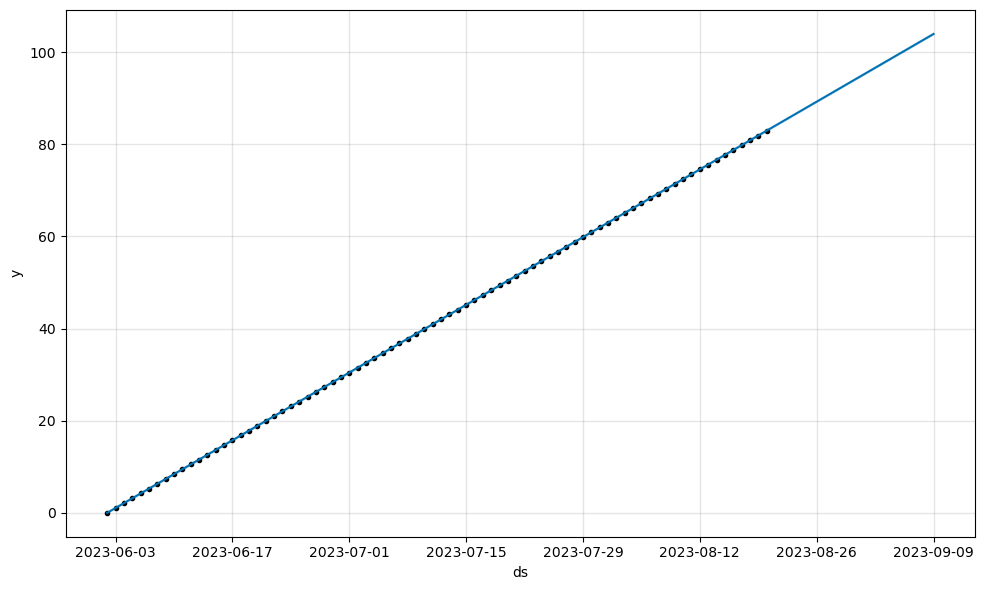

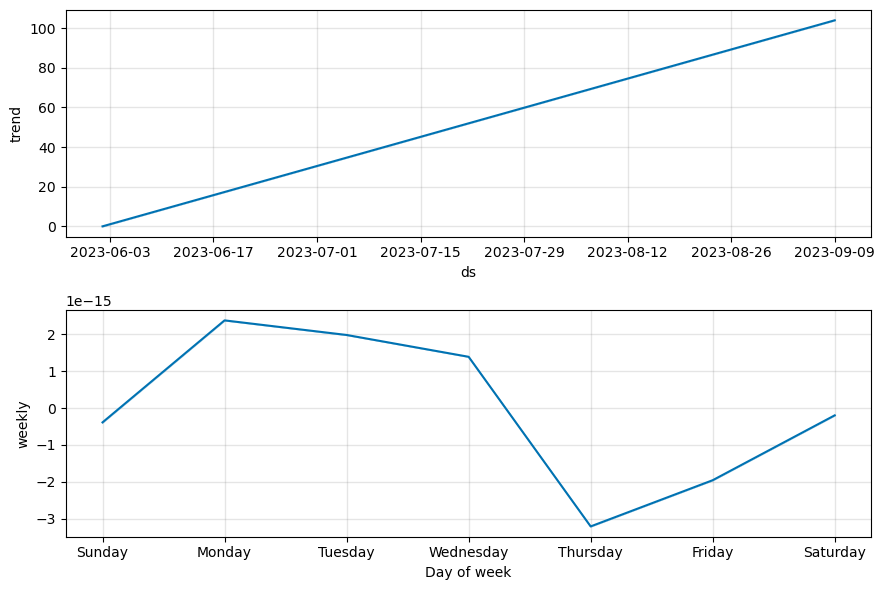

In [17]:
# Install prophet if not already installed
!pip install prophet

# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data creation
data = {
    'ds': pd.date_range(start='2023-06-02', periods=100, freq='D'),
    'y': [x + (x*0.05) for x in range(100)]
}
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Initialize the model
model = Prophet()

# Fit the model on the training data
model.fit(train_df)

# Create a dataframe for future dates that includes both train and test periods
future = model.make_future_dataframe(periods=len(test_df))

# Make predictions
forecast = model.predict(future)

# Extract the predicted values for the test period
predicted_values = forecast['yhat'][-len(test_df):].values
actual_values = test_df['y'].values

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f'RMSE: {rmse}')

# Plot the forecast
fig = model.plot(forecast)
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()
